In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_true=pd.read_excel(r'Сделки.xlsx')

In [3]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   КодТО                       3123 non-null   int64  
 1   Контрагент                  3123 non-null   object 
 2   ВидДеятельности             3123 non-null   object 
 3   Выручка 
Компании, руб      3123 non-null   int64  
 4   2021, руб                   2653 non-null   float64
 5   2022, руб                   2776 non-null   float64
 6   Вид купленной номенклатуры  2627 non-null   object 
 7   СистемаНалогообложения      1767 non-null   object 
 8   Адрес                       2998 non-null   object 
 9   РегионОбслуживания          3123 non-null   object 
 10  Статус                      3123 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 268.5+ KB


In [4]:
data_true = data_true[~data_true['СистемаНалогообложения'].isnull()]

# Рассмотрим только те данные, где есть полная информация
- Система налогообложения;
- Выручка от продаж;
- Статус;
- Регион обслуживания;

Таких сделок всего 1767

In [5]:
data_n_cnt=data_true.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'КодТО':"count"}) \
.rename(columns={"КодТО":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_n_cnt

,СистемаНалогообложения,Количество сделок
4,ОСНО,943
8,УСНО 6%,410
7,УСНО 15%,212
5,"ОСНО,УСНО",156
3,ЕСХН,17
0,Аутсорсинг,12
2,ЕНВД,10
1,Бюджет,6
6,Патент,1


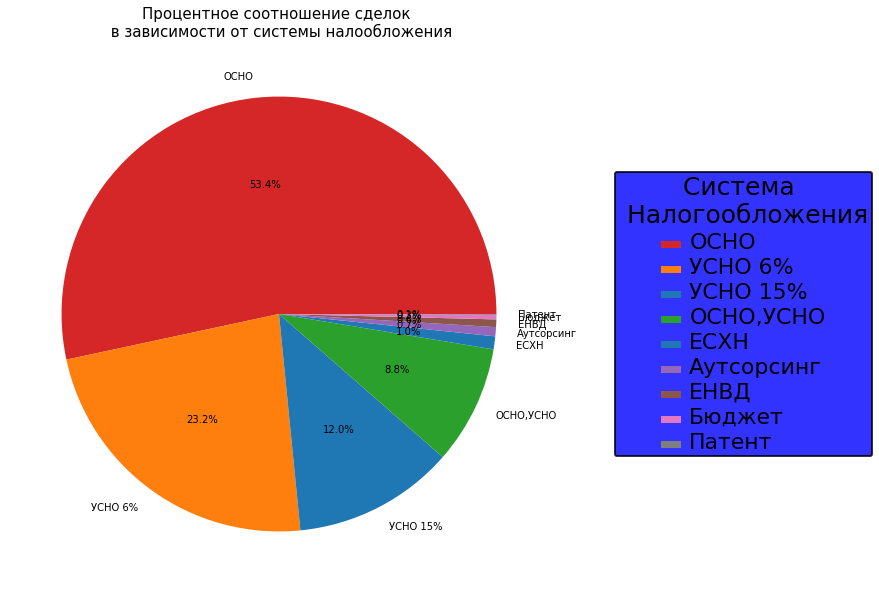

In [6]:
# Значения для диаграммы (пример)
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("Процентное соотношение сделок \n в зависимости от системы налообложения", fontsize=15)

plt.show()

In [7]:
data_s_cnt=data_true.groupby('Статус',as_index=False) \
.aggregate({'КодТО':"count"}) \
.rename(columns={"КодТО":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_s_cnt

,Статус,Количество сделок
0,Действующее,1739
1,Недействующие,27
2,Нет информации,1


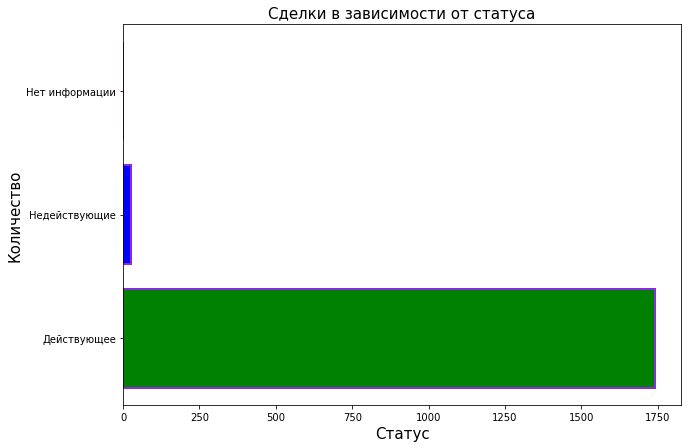

In [8]:
plt.figure(figsize=[10, 7])

plt.barh(data_s_cnt['Статус'], data_s_cnt['Количество сделок'], edgecolor='blueviolet',
        color=['g', 'b', 'r'], linewidth=2)

plt.title('Сделки в зависимости от статуса', fontsize=15)
plt.xlabel('Статус', fontsize=15)
plt.ylabel('Количество', fontsize=15)
# plt.xticks(rotation=90)
plt.show()

In [9]:
print('Выручка клиентов из официальных источников')
print()
print(data_true['Выручка \nКомпании, руб'].median(),'Медиана по выручке')
print(round(data_true['Выручка \nКомпании, руб'].mean(),2),'Среднее значение по выручке')
print(data_true['Выручка \nКомпании, руб'].max(),'Максимальное значение по выручке')
print(data_true['Выручка \nКомпании, руб'].min(),'Минимальное значение по выручке')

Выручка клиентов из официальных источников

70611000.0 Медиана по выручке
525759048.67 Среднее значение по выручке
205829787000 Максимальное значение по выручке
24000 Минимальное значение по выручке


- Медиана и среднее очень сильно отличаются; 
- Медиана меньше в 7 раз, распределение не нормальное;
- Тяжело сделать анализ по выручке.

In [10]:
quantile_25 = data_true['Выручка \nКомпании, руб'].quantile(0.25)
quantile_15 = data_true['Выручка \nКомпании, руб'].quantile(0.15)
quantile_20 = data_true['Выручка \nКомпании, руб'].quantile(0.20)
median=data_true['Выручка \nКомпании, руб'].median()
quantile_75 = data_true['Выручка \nКомпании, руб'].quantile(0.75)

In [11]:
print(f'У 15% клитентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')

У 15% клитентов, у которых была сделка, 
выручка меньше 19159899.999999996
а у 85% больше 19159899.999999996


In [12]:
print(f'У 20% клитентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')

У 20% клитентов, у которых была сделка, 
выручка меньше 24952600.000000007
а у 80% больше 24952600.000000007


In [14]:
print(f'У 25% клитентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')

У 25% клитентов, у которых была сделка, 
выручка меньше 29464000.0
а у 75% больше 29464000.0


In [15]:
print(f'У 50% клитентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')

У 50% клитентов, у которых была сделка, 
выручка меньше 70611000.0
а у 50% больше 70611000.0


In [16]:
print(f'У 75% клитентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

У 75% клитентов, у которых была сделка, 
выручка меньше 188051000.0
а у 25% больше 188051000.0


# Вывод
- Если у клиента Системаналогооблажения в порядке приоритета:
-  a) ОСНО;
-  b) УСНО;
-  c) УСНО;
-  d) ОСНО,УСНО;
- Регион Обслуживания Москва/МО;
- Статус является действующим;
- И Выручка больше 20 млн рублей

Такой клиент является Портретным